In [1]:
!kaggle datasets download jiwasambhuwara/food-ingredients

food-ingredients.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import os
import numpy as np
import zipfile
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

2023-05-15 17:11:27.733069: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 17:11:29.533037: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-05-15 17:11:29.533105: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/loca

In [3]:
!rm -rf ./data

In [4]:
os.mkdir('data')
with zipfile.ZipFile('food-ingredients.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

In [5]:
src_dir = './data/Food Dataset'
dst_dir = './data'

for root, dirs, files in os.walk(src_dir):
    for dir in dirs:
        # Join the root directory with the current directory to create the full path
        current_dir = os.path.join(root, dir)
        # Move the current directory and all its contents to the destination directory
        shutil.move(current_dir, dst_dir)

In [6]:
os.rmdir('./data/Food Dataset')

In [7]:
# Define the training and validation base directories
train_dir = './data/train'
test_dir = './data/test'
val_dir = './data/val'

labels = [name for name in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, name))]

# for i in range(len(labels)):
#     print(f"There are {len(os.listdir(os.path.join(train_dir, labels[i])))} images of {labels[i]} for training.\n")
#     print(f"There are {len(os.listdir(os.path.join(test_dir, labels[i])))} images of {labels[i]} for test.\n")
#     print(f"There are {len(os.listdir(os.path.join(val_dir, labels[i])))} images of {labels[i]} for validation.\n")

In [8]:
# Move each file in test folder to train folder
for label in labels:
    # Get a list of all the files in the source directory
    files = os.listdir(os.path.join(test_dir, label))

    # Move each file to the target directory
    for f in files:
        # Construct the full path to the file
        src_path = os.path.join(test_dir, os.path.join(label, f))
        dst_path = os.path.join(train_dir, os.path.join(label, f))
        shutil.move(src_path, dst_path)

In [9]:
# Use shutil.rmtree() to delete the folder and its subfolders
shutil.rmtree('./data/test')

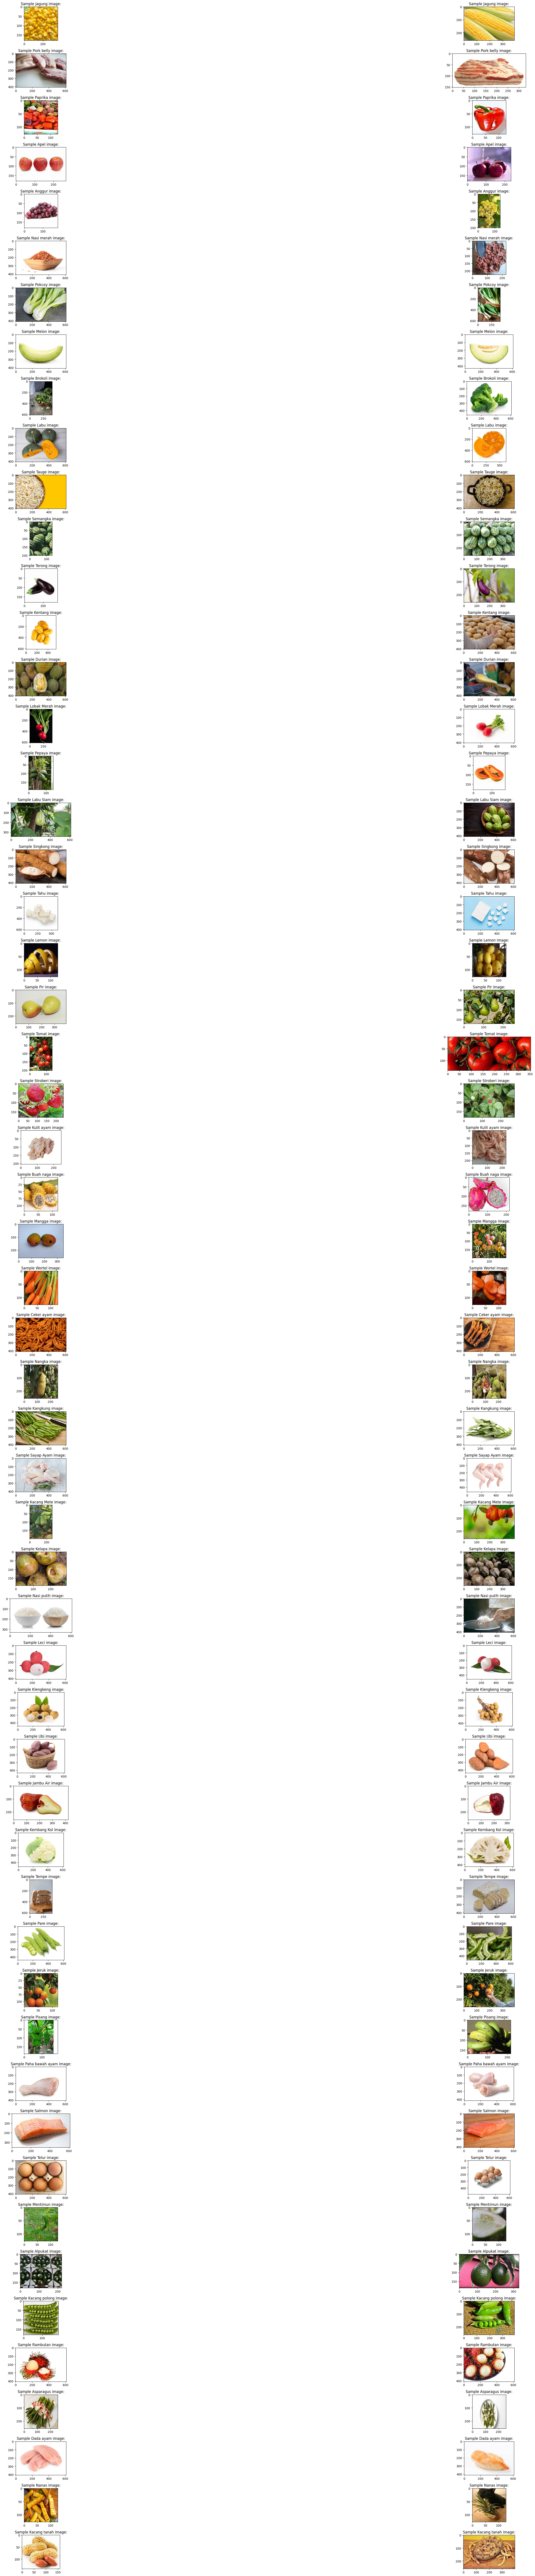

In [16]:
fig, axs = plt.subplots(nrows=len(labels), ncols=2, figsize=(60, 120))

for i in range(len(labels)):
    axs[i][0].set_title(f"Sample {labels[i]} image:")
    axs[i][0].imshow(load_img(f"{os.path.join(os.path.join(train_dir, labels[i]), os.listdir(os.path.join(train_dir, labels[i]))[0])}"))
    axs[i][1].set_title(f"Sample {labels[i]} image:")
    axs[i][1].imshow(load_img(f"{os.path.join(os.path.join(train_dir, labels[i]), os.listdir(os.path.join(train_dir, labels[i]))[1])}"))

plt.tight_layout()
plt.show()

In [11]:
for i in range(len(labels)):
    # Load the first example of a ingredient
    sample_image  = load_img(f"{os.path.join(os.path.join(train_dir, labels[i]), os.listdir(os.path.join(train_dir, labels[i]))[0])}")

    # Convert the image into its numpy array representation
    sample_array = img_to_array(sample_image)

    print(f"image has shape: {sample_array.shape}")

image has shape: (180, 180, 3)
image has shape: (408, 612, 3)
image has shape: (128, 128, 3)
image has shape: (180, 267, 3)
image has shape: (181, 180, 3)
image has shape: (408, 612, 3)
image has shape: (408, 612, 3)
image has shape: (408, 612, 3)
image has shape: (612, 408, 3)
image has shape: (408, 612, 3)
image has shape: (408, 612, 3)
image has shape: (201, 134, 3)
image has shape: (180, 177, 3)
image has shape: (612, 547, 3)
image has shape: (408, 612, 3)
image has shape: (612, 408, 3)
image has shape: (193, 142, 3)
image has shape: (344, 612, 3)
image has shape: (408, 612, 3)
image has shape: (612, 612, 3)
image has shape: (128, 128, 3)
image has shape: (260, 390, 3)
image has shape: (203, 136, 3)
image has shape: (180, 240, 3)
image has shape: (205, 246, 3)
image has shape: (120, 120, 3)
image has shape: (260, 347, 3)
image has shape: (128, 128, 3)
image has shape: (408, 612, 3)
image has shape: (256, 256, 3)
image has shape: (408, 612, 3)
image has shape: (408, 612, 3)
image ha